In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy 
import random
from copy import deepcopy
import time
import math

In [ ]:
'''
Clustering the players based on the number of balls faced by them, total runs scored,
number of 4s they hit and number of 6s they hit. 

This will render us the group of players who showed similar pattern in their batting style. That is to say,
players who hit same number of 4s and 6s and maintained a similar strike rates will create a cluster unqiue to them.

'''

In [9]:
 ''' Load the scrapped 'matches data', Data Preprocessing and extract the required information '''

#Matches_data.csv is a scrapped data from www.espncricinfo.com
testdf = pd.read_csv("C:\\...\\Cricket World Cup 2019 Analysis\\playersdata\\Matches_data.csv")
print("\nMatches Data Top Few Observations:\n")
display(testdf)


Matches Data Top Few Observations:



,Match_No,Match_date,Batting_team,Ball_no,Bowler,Batsmen,Runs,commentary
0,1st match,May 30 2019,ENG,NaN,NaN,NaN,NaN,NaN
1,1st match,May 30 2019,ENG,49.6,Rabada,Plunkett,1,"Rabada to Plunkett, 1 run, full again, can onl..."
2,1st match,May 30 2019,ENG,49.5,Rabada,Plunkett,2,"Rabada to Plunkett, 2 runs, fired in towards t..."
3,1st match,May 30 2019,ENG,49.4,Rabada,Archer,1,"Rabada to Archer, 1 run, pitched up and whippe..."
4,1st match,May 30 2019,ENG,49.3,Rabada,Archer,2,"Rabada to Archer, 2 runs, fullish, 86mph and f..."
...,...,...,...,...,...,...,...,...
28746,Final,Jul 14 2019,ENG,0.5,Boult,Bairstow,0,"Boult to Bairstow, no run, looks to flick, bal..."
28747,Final,Jul 14 2019,ENG,0.4,Boult,Bairstow,0,"Boult to Bairstow, no run, back of a length, h..."
28748,Final,Jul 14 2019,ENG,0.3,Boult,Bairstow,0,"Boult to Bairstow, no run, fullish, fourth-stu..."
28749,Final,Jul 14 2019,ENG,0.2,Boult,Roy,1,"Boult to Roy, 1 run, full again, more off-stum..."


In [10]:
"Data Preprocessing Phase[from scrapped Matches_data.csv]"

testdf1 = testdf.drop(['commentary'], axis=1)
testdf1 = testdf1.dropna()
testdf1['runs'] = testdf1['Runs'].astype(str).str[0]
testdf1['extras_type'] = testdf1['Runs'].astype(str).str[1:]
testdf1 = testdf1.replace(r'^\s*$', numpy.nan, regex=True)

#Split by delimiter(.) for Over column and introduce two columns- over and ball  --> 
testdf1[['over','ball']] = testdf1['Ball_no'].astype(str).str.split('.', expand=True)
testdf1['wicket'] = numpy.where(testdf1['runs'] == "W", 1, 0)
matchdata = testdf1.drop(['Ball_no', 'Runs'], axis=1)
matchdata['over'] = matchdata['over'].astype(numpy.int64)
matchdata['ball'] = matchdata['ball'].astype(numpy.int64)
matchdata['wicket'] = matchdata['wicket'].astype(numpy.int64)
del testdf1

matchdata.runs.replace(['W'], ['0'], inplace= True)
matchdata["runs"] = matchdata["runs"].astype('int64')
matchdata['Match_No'] = matchdata['Match_No'].str[0:5]
matchdata['datetime'] = pd.to_datetime(matchdata['Match_date'], dayfirst = True)
matchdata['month'] = matchdata['datetime'].apply(lambda x: x.strftime('%b')) 
matchdata['date'] = matchdata['datetime'].apply(lambda x: x.strftime('%d'))


matchnumber = {'1st m': 1, '2nd m': 2, '3rd m': 3,'4th m': 4, '5th m': 5, '6th m': 6, '7th m': 7, 
         '8th m': 8, '9th m': 9, '10th ': 10, '12th ': 12, '13th ': 13, '14th ': 14, '15th ': 15,
         '17th ': 17, '19th ': 19, '20th ': 20, '21st ': 21, '22nd ': 22, '23rd ': 23, '24th ': 24,
         '25th ': 25, '26th ': 26, '27th ': 27, '28th ': 28, '29th ': 29, '30th ': 30, '31st ': 31,
         '32nd ': 32, '33rd ': 33, '34th ': 34, '35th ': 35, '36th ': 36, '37th ': 37, '38th ': 38,
         '39th ': 39, '40th ': 40, '41st ': 41, '42nd ': 42, '43rd ': 43, '44th ': 44, '45th ': 45,
         '1st S': 46, '2nd S': 47, 'Final': 48} 
matchdata.Match_No = [matchnumber[i] for i in matchdata.Match_No] 
display(matchdata)

,Match_No,Match_date,Batting_team,Bowler,Batsmen,runs,extras_type,over,ball,wicket,datetime,month,date
1,1,May 30 2019,ENG,Rabada,Plunkett,1,NaN,49,6,0,2019-05-30,May,30
2,1,May 30 2019,ENG,Rabada,Plunkett,2,NaN,49,5,0,2019-05-30,May,30
3,1,May 30 2019,ENG,Rabada,Archer,1,NaN,49,4,0,2019-05-30,May,30
4,1,May 30 2019,ENG,Rabada,Archer,2,NaN,49,3,0,2019-05-30,May,30
5,1,May 30 2019,ENG,Rabada,Archer,4,NaN,49,2,0,2019-05-30,May,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28746,48,Jul 14 2019,ENG,Boult,Bairstow,0,NaN,0,5,0,2019-07-14,Jul,14
28747,48,Jul 14 2019,ENG,Boult,Bairstow,0,NaN,0,4,0,2019-07-14,Jul,14
28748,48,Jul 14 2019,ENG,Boult,Bairstow,0,NaN,0,3,0,2019-07-14,Jul,14
28749,48,Jul 14 2019,ENG,Boult,Roy,1,NaN,0,2,0,2019-07-14,Jul,14


In [12]:
# Data Preparation for Clustering - 

'Batsman data with number of balls played, runs scored, number of 4s hit, number of 6s hit'

wc_clustering = matchdata[['ball', 'Batsmen', 'runs']]
wc_clustering['fours'] = numpy.where(wc_clustering['runs'] == 4, 1, 0)

wc_clustering['sixes'] = numpy.where(wc_clustering['runs'] == 6, 1, 0)
wc_clustering['Batsmen'] = wc_clustering['Batsmen'].str.strip()
wc_clustering1 = wc_clustering.groupby(['Batsmen'], as_index = False).agg({"ball": "count", "runs": "sum", "fours": "sum", "sixes": "sum" })
print("\n Clustering data - Ball Counts, Total runs, Total 4s, total 6s")
display(wc_clustering1)

wc_clustering1["SR"] = wc_clustering1['runs']/wc_clustering1['ball'] # compute Strike rate by dividing runs by balls faced
# Map SR to SRR - 
# SRR [1] denotes SR< 0.5 ; SRR [2] denotes SR < 1 and SR >= 0.5 ; SRR [3] denotes SR >  1 
wc_clustering1.loc[wc_clustering1['SR'] < 0.5, 'SRR'] = 1
wc_clustering1.loc[(wc_clustering1['SR'] >= 0.5) & (wc_clustering1['SR'] < 1), 'SRR'] = 2 
wc_clustering1.loc[wc_clustering1['SR'] >= 1, 'SRR'] = 3
wc_clustering1 = wc_clustering1[["fours", "sixes", "SRR"]]
print("Clustering on Fours, Sizes, Strike Rate of a Player")
display(wc_clustering1)



 Clustering data - Ball Counts, Total runs, Total 4s, total 6s 


c:\users\ag89382\appdata\local\programs\python\python37\deepenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\ag89382\appdata\local\programs\python\python37\deepenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\ag89382\appdata\local\programs\python\python37\deepenv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a co

,Batsmen,ball,runs,fours,sixes
0,Aftab Alam,12,14,3,0
1,Ali,69,77,3,5
2,Allen,34,52,7,1
3,Ambris,47,37,3,0
4,Amla,326,218,17,0
...,...,...,...,...,...
144,de Grandhomme,194,202,17,4
145,de Kock,374,325,35,4
146,de Silva,180,116,8,0
147,du Plessis,445,407,37,4


Clustering on Fours, Sizes, Strike Rate of a Player


,fours,sixes,SRR
0,3,0,3.0
1,3,5,3.0
2,7,1,3.0
3,3,0,2.0
4,17,0,2.0
...,...,...,...
144,17,4,3.0
145,35,4,2.0
146,8,0,2.0
147,37,4,2.0


Minimize Error till convergence is reached for projected digits data with K = 5:
3719550739.4166374
9.055385138137417
4.242640687119285
2.6457513110645907
2.23606797749979
1.4142135623730951
0.0


   Cluster Number  ClusterPoints  Iterations_to_converge
0               1             85                       7
1               3             15                       7
2               4             49                       7
Final detailed summary after final iterations(i.e. point when no cluster centroid change happens) for each class label:-




c:\users\ag89382\appdata\local\programs\python\python37\deepenv\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\ag89382\appdata\local\programs\python\python37\deepenv\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


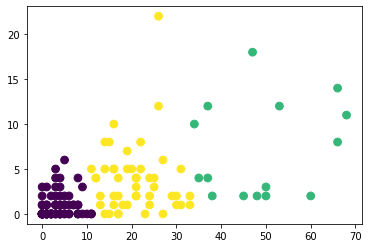

In [11]:
"""U4.Step2 - Implement k means clustering """

# k means clustering with K =  3 => 

wc = wc_clustering1.values
cluster_numbers = []  # cluster no will be stored and that will be used in end result dataframe
cluster_points = []  #cluster points(count of datapoints within each cluster are stored for a particular class label)
iter_to_converge = [] # Store iteraation to converge for each class label subset data
classlabel = []  # we will store the each class label so that in the end, we can build a dataframe having class label and corresponding convergence time
 
centroidval = []

for k in range(0,3):
    random.seed(k)
    centroidval.append(random.sample(range(int(numpy.mean(wc) - 3*numpy.std(wc)), int(numpy.mean(wc) + 3*numpy.std(wc))), 5))

centroidpoints = numpy.transpose(centroidval)  
centers_initialize = numpy.zeros(centroidpoints.shape, order = "C") 

er = numpy.linalg.norm(centroidpoints - centers_initialize) 
c = 0
k = 5
print("Minimize Error till convergence is reached for projected digits data with K = 5:")
while er!=0:
    clusterindex_storage = []
    for rowval in range(0, len(wc)):
        distance_with_centroids = numpy.linalg.norm(x = wc[rowval] - centroidpoints, keepdims = False,  axis=1)  # shape (10, 0) since we get distance of each row(in 30 dimensions data) with each of the 10 centroid centers.
        arr_to_lst = distance_with_centroids.tolist()
        clusterindex = arr_to_lst.index(min(arr_to_lst))  # Let's say we get clusterindex = 9.
        #That means that the index value associated with minimum number in the list of distances is 9. Note that- list of distances are the distances of each row in our data with centroid centers.
        clusterindex_storage.append(clusterindex)
        #store cluster index of min distance of each row (in our data to be clustered) from centroids centers(shape of centroid center = 10*30 since each centroid center lies in 30 dimensions)
        #shape of clusterindex_storage is (number of rows in data, ) since each value = cluster index corresponding to each observation

    clusterindex_storage = numpy.asarray(clusterindex_storage)
    centers_initialize = deepcopy(centroidpoints) #copy cluster centroid points to initialised centers with zero since we will update it.

#assign number of cluster-

    for clusterno in range(0, k):  # iunique class labels from the original dataset
        rows_in_a_particular_cluster = [wc[row] for row in range(len(wc)) if clusterindex_storage[row] == clusterno]

        if (len([wc[row] for row in range(len(wc)) if clusterindex_storage[row] == clusterno]) == 0):
            rows_in_a_particular_cluster = [wc[row] for row in range(len(wc)) if clusterindex_storage[row] == clusterno-1]
        else:
            rows_in_a_particular_cluster = [wc[row] for row in range(len(wc)) if clusterindex_storage[row] == clusterno]

        centroidpoints[clusterno] = numpy.mean(rows_in_a_particular_cluster, axis=0)

    er = numpy.linalg.norm(centroidpoints - centers_initialize)

    print(er)
    c = c + 1

clustercenters, clusterpoints = numpy.unique(clusterindex_storage, axis = None, return_counts=True, return_inverse=False)
print("\n")

print(pd.DataFrame({'Cluster Number':clustercenters, 'ClusterPoints':clusterpoints, 'Iterations_to_converge': c}))
    
list_cc = list(clustercenters)
list_pp = list(clusterpoints)
itertoconverge = numpy.repeat(c, len(clustercenters))
    
cluster_numbers.extend(list_cc)  #Cluster number for a class label to which datapoints belongs or are nearest to.
cluster_points.extend(list_pp)   # Datapoints associated with each cluster for a particular class label.
iter_to_converge.extend(itertoconverge)
    
final_5_cluster = pd.DataFrame(list(zip(cluster_numbers, cluster_points, iter_to_converge)), columns =['Cluster_Number', "Datapoints_in_Cluster", "Iteration_to_Converge"]) 
print("Final detailed summary after final iterations(i.e. point when no cluster centroid change happens) for each class label:-")
final_5_cluster


print("\n")
plt.scatter(wc[:, 0], wc[:, 1], c=clusterindex_storage, s=60);

In [ ]:
"""
x - axis  = count of 4s  ; y axis = count of 6 s

We observe that there are very few batsmen who hit more than 20 sixes in world cup. 
Also, cluster is much dense towards origin i.e. most of batsmen hitted less than 
5 sixes or less than 10 fours or both.